# CH273: Key Skills 1

## Boltzmann statistics: a Pythonic Tale (Vol I)

<img src="./STUFF/kb_1.jpg" width="600">

In this session, we are going to explore in further detail the Boltzmann statistics - using Python, of course, particularly the `matplotlib` package to visualise the relevant distributions

In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

### (Maxwell-)Boltzmann statistic

*Fun fact: really, Boltzmann statistics should be called Maxwell-Boltzmann statistics. This statistics describes the population of the energy levels for a system of $N$ indistinguishable particles - assuming that the number of energy levels $n_E$ available to the particles is much greater than $N$. Confusingly enough, though, many refer to the Maxwell-Boltzmann distribution as the probability (density) of these particles to move around with a certain velocity. To avoid any confusion, we will refer to the Maxwell-Boltzmann statistics as "Boltzmann statistics" alone.*

Let's get to it, then. We know that, according to Boltzmann statistics, the probability of a system of $N$ indistinguishable particles to be found in a particular energy state $E_i$ is:

$$
P(E_i)  = \frac{e^{-\frac{E_i}{kBT}}}{Q(N,V,T)} 
        = \frac{e^{-\frac{E_i}{kBT}}} {\sum_{i=1}^{N_i}e^{-\frac{E_i}{kBT}}}
$$

which in turn is also equal to the fraction $n_i$ of particles with energy $E_i$, that is:

$$
P(E_i) = \frac{n_i}{N} = \frac{e^{-\frac{E_i}{kBT}}} {\sum_{i=1}^{N_i}e^{-\frac{E_i}{kBT}}}
$$

Thus, if we want to calculate how many particles $n_i$ with energy $E_i$ you would expect to find according to Boltzmann statistics...

$$ 
n_i = \frac{N\cdot e^{-\frac{E_i}{kBT}}} {\sum_{i=1}^{N_i}e^{-\frac{E_i}{kBT}}}
$$

### Room temperature
Consider a system at room temperature (300 K), within the NVT ensemble. This system containes 5,000 particles and it is characterised by 50,000 energy levels, equally spaced between 0 and $100\cdot k_BT$ eV. According to the expression above...

In [2]:
# Set the temperature we are working on: 300 K
temp = 300 # K

# Define the Boltzmann constant, kB, in eV * K^{-1}
kb = 8.617333262145e-5 # eV * K^{-1}

kbt = kb * temp # eV

# How many particles?
par = 5000

# How many energy values?
en = 50000

# Build a numpy array containing our 10,000 energy levels
energy = np.linspace(0,100*kbt,en)

# Compute the canonical partition function
Q = 0
for i in energy:
    Q = Q + np.exp(-i/kbt)
    
# Compute the number of particles expected to be found for each energy value
n_ei = np.zeros(en)
c = 0 # counter

for i in energy:
    n_ei[c] =  (np.exp(-i/kbt))
    c = c+1

n_ei = n_ei * (par/Q) 

In [3]:
# Check that the sum of all the mean occupation numbers if equal to the number of particles
print(par,np.sum(n_ei))

5000 5000.000000000094


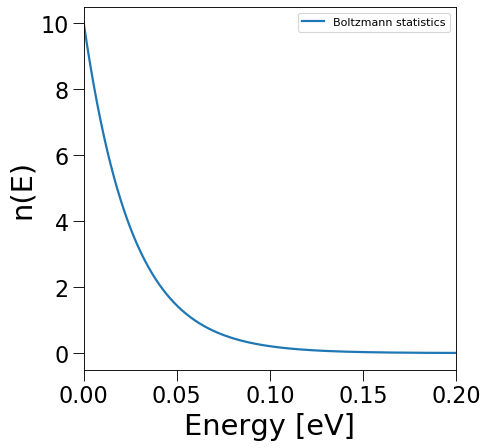

In [4]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot(energy, n_ei, lw=2, label="Boltzmann statistics")

plt.xlim(0,0.2)
plt.xlabel('Energy [eV]', fontsize=26)
plt.ylabel('n(E)', fontsize=26)
plt.legend()
plt.show()

### Bose-Einstein statistics
Let's have a look at what the Bose-Einstein statistics result would look like instead. We are going to consider exactly the same number of particles (5,000) at exactly the same temperature (300 K). The number $n_i$ of particles we are expecting to find in a certain energy $E_i$ according to the Bose-Einstein statistics is:

$$
n_i = \frac{1} {e^{\frac{(E_i-\mu)}{k_BT}}-1}
$$

We have not derived this expression in the lectures, but still, we notice that we need to define a mysterious parameter $\mu$. Turns out that this mysterious parameter is in fact the chemical potential of the system! In principle, which should be choosing the value of $\mu$ in such a way to satisfy the following requirement:

$$
\sum_{i=1}^{N}n_i = N,
$$

that is, if we sum up all the occupation numbers we should end up with the number of particles we have in the system. However, as we will end up comparing these statistics at different temperatures, we will fail to satify this requirement (in favour of a qualitative but clear comparison between the different statistics).

In [5]:
# Bose-Einstein
mu = 0.01 # eV
    
# Compute the number of particles expected to be found for each energy value
n_be = np.zeros(en)
c = 0 # counter

for i in energy:
    n_be[c] =  1.0 / ((np.exp((i-mu)/kbt))-1.0)
    c = c+1
    
# The sum of n_i is NOT = N, as we have chosen a random(-ish...) value for \mu.
# In fact, you can even get a negative number here (?!), because of what this
# statistics does for E < \mu...

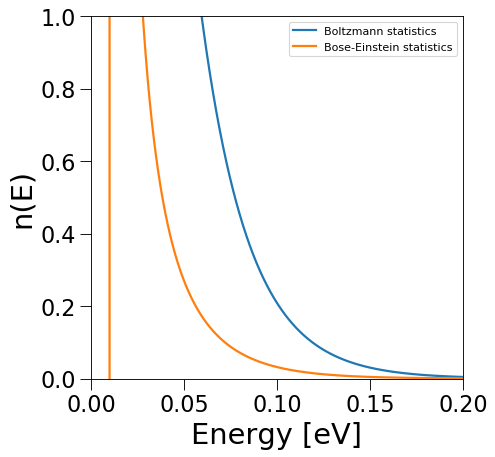

In [6]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot(energy, n_ei, lw=2, label="Boltzmann statistics")
plt.plot(energy, n_be, lw=2, label="Bose-Einstein statistics")

plt.xlabel('Energy [eV]', fontsize=26)
plt.ylabel('n(E)', fontsize=26)
plt.xlim(0,0.2)
plt.ylim(0,1)
plt.legend()
plt.show()

Note that for energies below $\mu$ the occupation number is actually smaller than zero, which makes no sense! This is because the Bose-Einstein distribution only makes sense for $E >\mu$. 

Also note that, at room temperature, it looks like the occupation obtained via the Boltzmann statistics is too incredibly dissimilar if compared to the Bose-Einstein statistics. What about the Fermi-Dirac, then?

### Fermi-Dirac statistics
We are going to consider exactly the same number of particles (5,000) at exactly the same temperature (300 K). The number $n_i$ of particles we are expecting to find in a certain energy $E_i$ according to the Bose-Einstein statistics is:

$$
n_i = \frac{1} {e^{\frac{(E_i-\mu)}{k_BT}}+1}
$$

Note that the only difference between the Fermi-Dirac statistics and the Bose-Einstein statistics is the $\pm$ 1 in the denominator. Subtle difference at first, but it has a big impact! 

The only thing we will change is the energy range. Up to now we have worked in the $0-100 k_B\cdot T$ range. To fully appreciate what the Fermi-Dirac statistics does for $E < \mu$ (and yes, as opposed to the Bose-Einstein statistics the Fermi *does* make sense for $E < \mu$!) we will expand the energy range to be $-100 k_B\cdot T - 100 k_B\cdot T $ Let's see what we get...

In [7]:
# Fermi-Dirac

# Expanded energy range
energy_fd = np.linspace(-100*kbt,100*kbt,en*2)

# Compute the number of particles expected to be found for each energy value
n_fd = np.zeros(en*2)
c = 0 # counter

for i in energy_fd:
    n_fd[c] =  1.0 / ((np.exp((i-mu)/kbt))+1.0)
    c = c+1

# Note that the sum of n_i is NOT = N! The price to be paid to consider exactly the same chemical potential across
# different statistics...

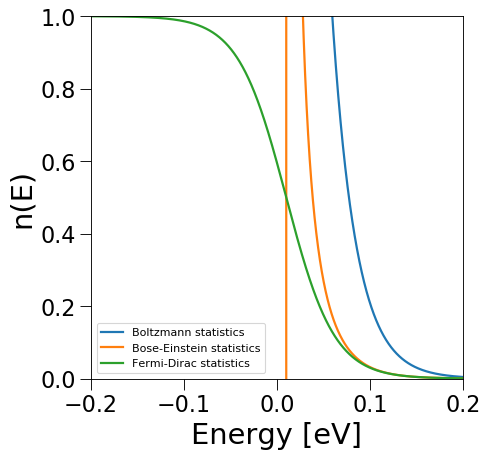

In [8]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot(energy, n_ei, lw=2, label="Boltzmann statistics")
plt.plot(energy, n_be, lw=2, label="Bose-Einstein statistics")
plt.plot(energy_fd, n_fd, lw=2, label="Fermi-Dirac statistics")

plt.xlabel('Energy [eV]', fontsize=26)
plt.ylabel('n(E)', fontsize=26)
plt.xlim(-0.2,0.2)
plt.ylim(0,1)
# plt.savefig("test.png")
plt.legend()
plt.show()

Here, we see that the Fermi-Dirac statistics deviates significantly from both the Boltzmann and Bose-Einstein, *particularly in the low energy range*. This makes sense, because as we approach the ground state (the lowest energy state) the effects of the Pauli exclusion principles (namely, the fact that two particles cannot occupy the same state) becomes more and more evident.

### Temperature dependence
Wouldn't it be cool if we were able to look at how these threee statistics evolve as a function of temperature? Well, Python can make this a reality! 

<IPython.core.display.Javascript object>


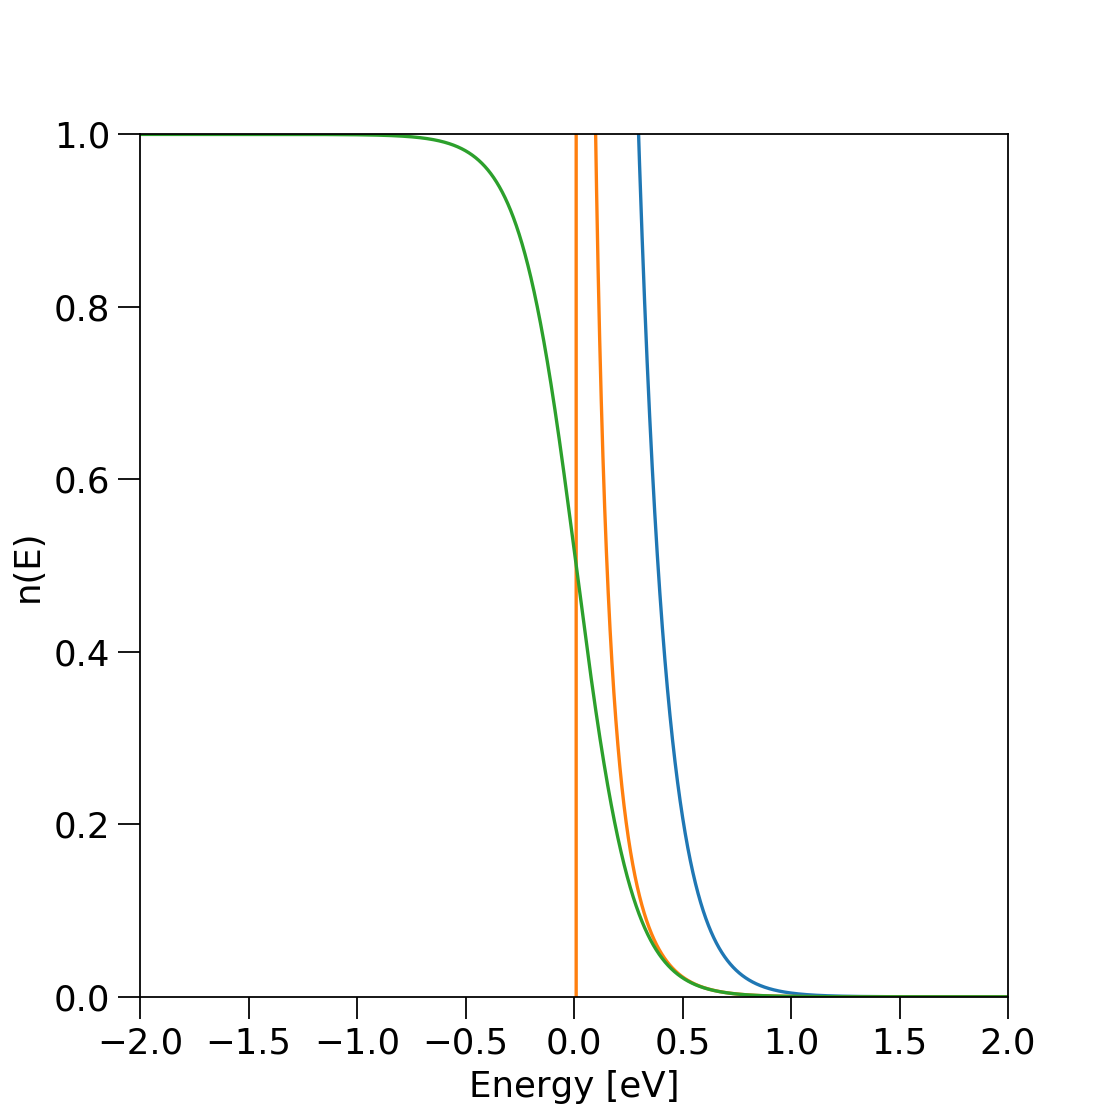

interactive(children=(IntSlider(value=5, description='w', max=20, min=1), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=5, description='w', max=20, min=1), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=5, description='w', max=20, min=1), Output()), _dom_classes=('widget-int…

In [9]:
# Mystery line needed to display the awesomeness
%matplotlib notebook

fig = plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=16.0)

# Define the three thinsg we want to plot
mb, = ax.plot(energy, (par/Q)*np.exp(-energy/kbt))
be, = ax.plot(energy, 1.0 / ((np.exp((energy-mu)/kbt))-1.0))
fd, = ax.plot(energy_fd, 1.0 / ((np.exp((energy_fd-mu)/kbt))+1.0))

# For each of the things we want to plot, build a function that tunes the parameter
# we want to tune, in this case the temperature, by means of a "handle", w

def update(w):
    mb.set_ydata((par/Q)*np.exp(-energy/(kbt*w)))
    fig.canvas.draw()
    
def updatee(w):
    be.set_ydata(1.0 / ((np.exp((energy-mu)/(kbt*w)))-1.0))
    fig.canvas.draw()
    
def updateee(w):
    fd.set_ydata(1.0 / ((np.exp((energy_fd-mu)/(kbt*w)))+1.0))
    fig.canvas.draw()

plt.xlim(-2,2)
plt.ylim(0,1)

# Create some cool sliders that allow us to study the temperature dependence
# of each statistics
interact(update, w=widgets.IntSlider(min=1, max=20, step=1, value=5))
interact(updatee, w=widgets.IntSlider(min=1, max=20, step=1, value=5))
interact(updateee, w=widgets.IntSlider(min=1, max=20, step=1, value=5))
plt.xlabel("Energy [eV]", fontsize=16)
plt.ylabel("n(E)", fontsize=16)
plt.show()

The value of $w$ multiplies $k_B T$ in each statistics. We start with $w=5$, which means that we are working at really high temperature (high enough for the thermal energy $k_B T$ to be 5 times larger than what we got at room temperature). Have a look at what happens at even higher temperatures...

<div class="alert alert-block alert-info">
    
<h2>Task 1</h2>

* Plot the Boltzmann factor (as a function of energy) for this system as a function of temperature as well, using the "slider" approach (acting on the temperature, as $k_B T$) we have used above

<div/>

<IPython.core.display.Javascript object>


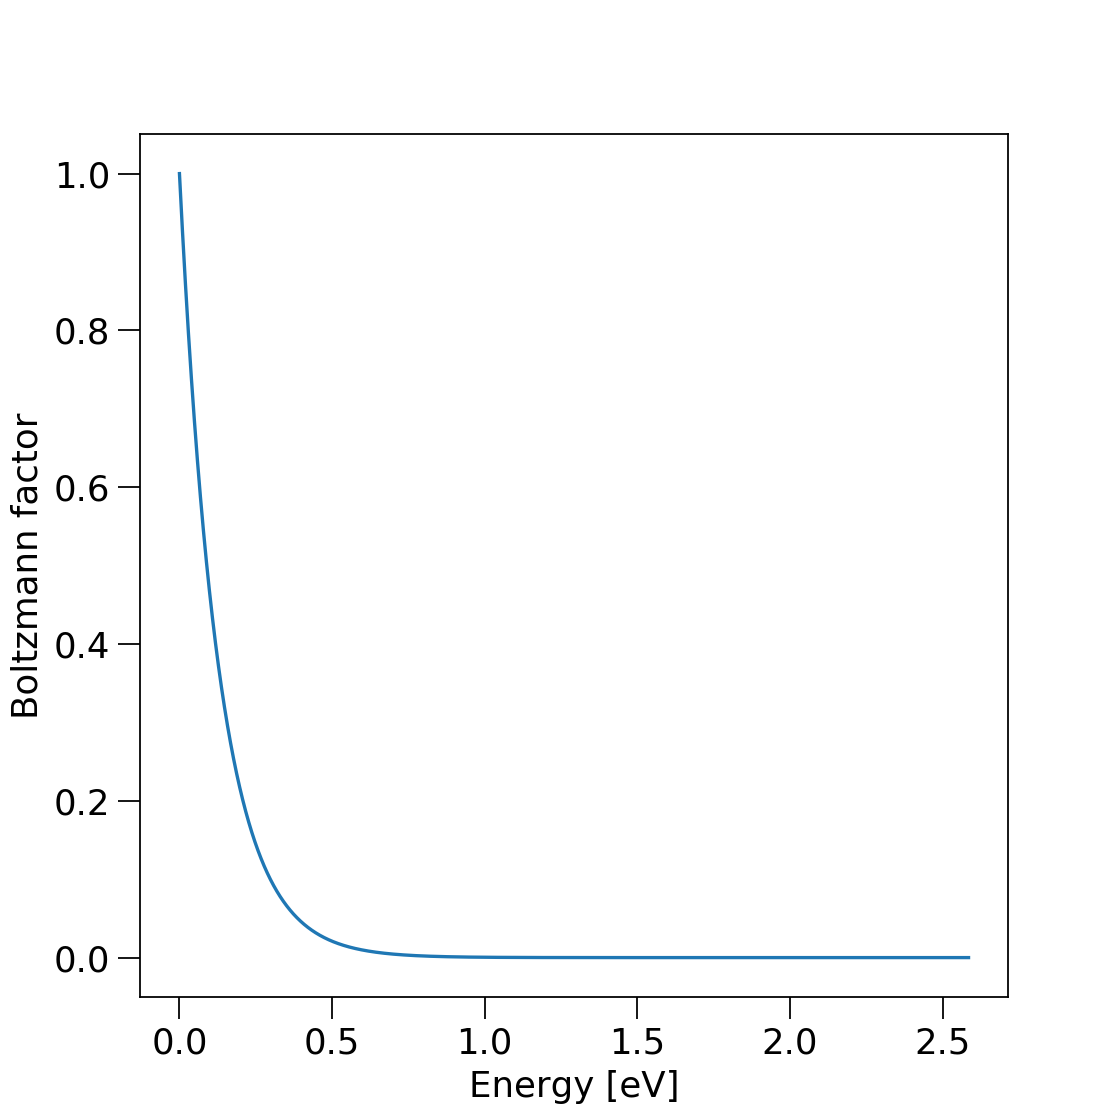

interactive(children=(IntSlider(value=5, description='w', max=20, min=1), Output()), _dom_classes=('widget-int…

In [10]:
fig = plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=16.0)

qt, = ax.plot(energy, np.exp(-energy/kbt))

def u_qc(w):
    qt.set_ydata(np.exp(-energy/(kbt*w)))
    fig.canvas.draw()


# plt.xlim(-2,2)
# plt.ylim(0,1)

# Create some cool sliders that allow us to study the temperature dependence
# of each statistics
interact(u_qc, w=widgets.IntSlider(min=1, max=20, step=1, value=5))
plt.xlabel("Energy [eV]", fontsize=16)
plt.ylabel("Boltzmann factor", fontsize=16)
plt.show()